In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting base directory path
base_dir = '/content/drive/My Drive/TRAFFIC SIGN CLASSIFICATION/Traffic-Sign-Classification-main/MAIN/data/multi-class/New folder/'
CATEGORIES = ['STOP', 'aheadonly', 'p_crossing','bike', 'gostraightorleft','noentry', 'roundabout', 'speedlimit:20','speedlimit100', 'Trucks']

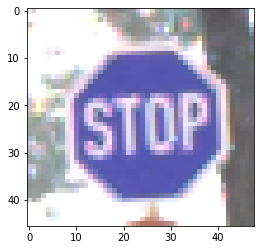

In [ ]:
for category in CATEGORIES:
    path=os.path.join(base_dir, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(base_dir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(32,32))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass


In [ ]:
create_training_data()
print(len(training_data))

2303


In [ ]:
lenofimage = len(training_data)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [ ]:
X.shape

(2303, 3072)

In [ ]:
X = X/255.0

In [ ]:
X[1]

array([0.57254902, 0.60784314, 0.60784314, ..., 0.37254902, 0.36862745,
       0.38039216])

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(2303,)

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
classes = ['STOP', 'aheadonly', 'p_crossing','bike', 'gostraightorleft','noentry', 'roundabout', 'speedlimit:20','speedlimit100', 'Trucks']

In [ ]:
y_pred = svc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred) 
print(classification_report(y_test, y_pred, target_names = classes))

                  precision    recall  f1-score   support

            STOP       1.00      1.00      1.00        27
       aheadonly       1.00      0.98      0.99        53
      p_crossing       0.96      1.00      0.98        47
            bike       0.96      0.96      0.96        28
gostraightorleft       1.00      1.00      1.00        48
         noentry       1.00      1.00      1.00        60
      roundabout       1.00      1.00      1.00        56
   speedlimit:20       1.00      0.97      0.98        29
   speedlimit100       0.96      1.00      0.98        46
          Trucks       1.00      0.97      0.98        67

        accuracy                           0.99       461
       macro avg       0.99      0.99      0.99       461
    weighted avg       0.99      0.99      0.99       461



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

Accuracy on unknown data is 0.9891540130151844


In [ ]:


# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
result

,original,predicted
0,5,5
1,6,6
2,5,5
3,0,0
4,5,5
...,...,...
456,0,0
457,9,9
458,1,1
459,9,9


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predrf =clf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predrf) 
print(classification_report(y_test, y_predrf, target_names = classes))

                  precision    recall  f1-score   support

            STOP       0.96      1.00      0.98        27
       aheadonly       1.00      0.98      0.99        53
      p_crossing       0.98      1.00      0.99        47
            bike       1.00      1.00      1.00        28
gostraightorleft       1.00      1.00      1.00        48
         noentry       1.00      0.98      0.99        60
      roundabout       1.00      1.00      1.00        56
   speedlimit:20       0.97      0.97      0.97        29
   speedlimit100       0.96      0.98      0.97        46
          Trucks       1.00      0.99      0.99        67

        accuracy                           0.99       461
       macro avg       0.99      0.99      0.99       461
    weighted avg       0.99      0.99      0.99       461



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_predrf))

Accuracy on unknown data is 0.9891540130151844


In [ ]:


# calculate false positive rate and true positive rate at different thresholds
false_positive_raterf, true_positive_raterf, thresholds = roc_curve(y_testrf, y_predrf, pos_label=1)

# calculate AUC
roc_aucrf = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_aucrf))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
resultrf = pd.DataFrame({'original' : y_test,'predicted' : y_predrf})
resultrf




,original,predicted
0,5,5
1,6,6
2,5,5
3,0,0
4,5,5
...,...,...
456,0,0
457,9,9
458,1,1
459,9,9
